In [2]:
import pandas as pd

# 파일 경로 설정
file_path_elderly_accidents = '2020_2022서울노인보행자사고.csv'
file_path_comprehensive_db = '종합db.csv'

# 노인 보행자 사고 데이터 불러오기
elderly_accidents_data = pd.read_csv(file_path_elderly_accidents, encoding='EUC-KR')

# 종합 데이터베이스 불러오기
comprehensive_db_data = pd.read_csv(file_path_comprehensive_db, encoding='utf-8')

# 두 데이터셋의 기본 정보 및 첫 몇 줄의 데이터 확인
elderly_accidents_info = elderly_accidents_data.info()
comprehensive_db_info = comprehensive_db_data.info()
elderly_accidents_head = elderly_accidents_data.head()
comprehensive_db_head = comprehensive_db_data.head()

elderly_accidents_info, comprehensive_db_info, elderly_accidents_head, comprehensive_db_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373 entries, 0 to 5372
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        5373 non-null   int64 
 1   사고일시        5373 non-null   object
 2   요일          5373 non-null   object
 3   시군구         5373 non-null   object
 4   사고내용        5373 non-null   object
 5   사망자수        5373 non-null   int64 
 6   중상자수        5373 non-null   int64 
 7   경상자수        5373 non-null   int64 
 8   부상신고자수      5373 non-null   int64 
 9   사고유형        5373 non-null   object
 10  법규위반        5373 non-null   object
 11  노면상태        5373 non-null   object
 12  기상상태        5373 non-null   object
 13  도로형태        5373 non-null   object
 14  가해운전자 차종    5373 non-null   object
 15  가해운전자 성별    5373 non-null   object
 16  가해운전자 연령    5373 non-null   object
 17  가해운전자 상해정도  5373 non-null   object
 18  피해운전자 차종    5373 non-null   object
 19  피해운전자 성별    5373 non-null   object
 20  피해운전자 연령

(None,
 None,
                사고번호             사고일시   요일             시군구  사고내용  사망자수  중상자수  \
 0  2020010100100198  2020년 1월 1일 15시  수요일   서울특별시 도봉구 방학동  경상사고     0     0   
 1  2020010100100286  2020년 1월 1일 19시  수요일  서울특별시 동대문구 전농동  중상사고     0     1   
 2  2020010100100288  2020년 1월 1일 19시  수요일   서울특별시 강동구 암사동  경상사고     0     0   
 3  2020010100100333  2020년 1월 1일 21시  수요일   서울특별시 강남구 삼성동  경상사고     0     0   
 4  2020010200100036  2020년 1월 2일 06시  목요일  ㄴ서울특별시 양천구 신정동  중상사고     0     1   
 
    경상자수  부상신고자수        사고유형  ... 기상상태            도로형태 가해운전자 차종 가해운전자 성별  \
 0     1       0   차대사람 - 기타  ...   맑음        단일로 - 기타       승용        남   
 1     0       0  차대사람 - 횡단중  ...   흐림         기타 - 기타       승용        여   
 2     1       0  차대사람 - 횡단중  ...   맑음      교차로 - 교차로안       승용        남   
 3     1       0  차대사람 - 횡단중  ...   맑음         기타 - 기타       승용        남   
 4     0       0  차대사람 - 횡단중  ...   맑음  교차로 - 교차로횡단보도내       승합        여   
 
   가해운전자 연령 가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피해운전자

In [11]:
# '시군구' 컬럼에서 '구'까지만 추출하여 교통사고 발생 횟수를 다시 집계
elderly_accidents_data['구'] = elderly_accidents_data['시군구'].str.extract(r'(서울특별시\s[가-힣]+구)')
accident_counts_by_district = elderly_accidents_data['구'].value_counts()

# 결과 출력
accident_counts_by_district.head()  # 처음 몇 개의 구만 출력하여 결과 확인

구
서울특별시 동대문구    372
서울특별시 강서구     293
서울특별시 송파구     285
서울특별시 중랑구     272
서울특별시 성북구     262
Name: count, dtype: int64

In [13]:
# '피해운전자 연령' 칼럼에서 '세'를 제거하고 정수형으로 변환하는 함수를 수정하여 '98 이상'과 같은 값 처리
def convert_age(age_str):
    if '세' in age_str:
        age_str = age_str.replace('세', '').strip()
        if age_str == '98 이상':
            return 98  # '98 이상'을 98로 처리
        return int(age_str)
    return None

# '피해운전자 연령' 칼럼을 다시 변환
elderly_accidents_data['피해운전자 연령'] = elderly_accidents_data['피해운전자 연령'].apply(convert_age)

# 60세 미만인 피해운전자 데이터 제거
elderly_accidents_data = elderly_accidents_data[elderly_accidents_data['피해운전자 연령'] >= 60]

# '사고유형' 컬럼에서 '차대차' 사고 유형이 포함된 행 삭제
elderly_accidents_data = elderly_accidents_data[~elderly_accidents_data['사고유형'].str.contains('차대차')]

# 변경된 데이터 확인
elderly_accidents_data.count()


TypeError: argument of type 'float' is not iterable

In [15]:
# 60세 미만 데이터의 개수 확인
under_60_count = elderly_accidents_data[elderly_accidents_data['피해운전자 연령'] < 60].shape[0]

# 60세 이상 데이터만 필터링
data_over_60 = elderly_accidents_data[elderly_accidents_data['피해운전자 연령'] >= 60]

under_60_count, data_over_60.shape

(0, (5284, 23))

In [5]:
# '피해운전자 연령' 별로 사고 건수 집계 (60세 이상 데이터에 대해서)
age_accident_counts_over_60 = data_over_60['피해운전자 연령'].value_counts().sort_index()

# 결과 출력
age_accident_counts_over_60.tail(10)  # 처음 몇 개의 연령 데이터만 출력하여 확인

피해운전자 연령
89.0    30
90.0    22
91.0    13
92.0    11
93.0    13
94.0     5
95.0     4
96.0     1
97.0     2
98.0     6
Name: count, dtype: int64

In [6]:
age_accident_counts_over_60.head(10) 

피해운전자 연령
60.0      2
61.0      1
62.0      3
63.0      2
64.0      3
65.0    405
66.0    312
67.0    331
68.0    333
69.0    311
Name: count, dtype: int64

In [7]:
# "피해운전자 상해정도" 칼럼에서 값이 "사망"인 데이터를 필터링합니다.
deaths_data = elderly_accidents_data[elderly_accidents_data['피해운전자 상해정도'] == '사망']

# 필터링된 데이터의 개수를 출력합니다.
print("사망 데이터 개수:", len(deaths_data))
deaths_data.head(2)

사망 데이터 개수: 186


,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
25,2020010600100145,2020년 1월 6일 10시,월요일,서울특별시 강서구 방화동,사망사고,1,0,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,화물,남,47세,상해없음,보행자,남,75.0,사망
38,2020010700100707,2020년 1월 7일 22시,화요일,서울특별시 서초구 방배동,사망사고,1,0,0,0,차대사람 - 차도통행중,...,비,단일로 - 기타,승용,남,62세,상해없음,보행자,남,72.0,사망


In [8]:
# 노인 인구수 데이터 파일 경로
population_file_path = '주민등록인구(연령별_동별)_20240123142830.csv'

# CSV 파일 로드
population_data = pd.read_csv(population_file_path, encoding='utf-8')

# 데이터의 처음 몇 줄을 출력하여 구조 확인
population_data.head()


,동별(1),항목,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,...,2021.8,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8
0,동별(1),항목,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,...,100세 이상,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상
1,합계,계,726905,533767,406116,300147,188621,90072,33584,9211,...,1665,729540,585417,410611,305700,219981,101884,34635,7864,1319
2,종로구,계,11780,8569,6784,5787,4011,1985,804,291,...,32,11688,9047,6251,5237,4358,2117,729,190,29
3,중구,계,10431,7669,5988,4858,3202,1668,700,205,...,26,10251,8401,5809,4587,3617,1784,670,157,30
4,용산구,계,17332,12245,9547,7842,5666,2939,1197,438,...,73,16847,13093,8778,6935,5776,3080,1097,237,41


In [9]:
# 60세 이상 노인 인구수를 계산하기 위한 컬럼 선택
# 2020년, 2021년, 2022년 데이터를 사용
elderly_population_columns = [col for col in population_data.columns if '2020' in col or '2021' in col or '2022' in col]

# 노인 인구수 합산
# 첫 번째 행(컬럼 설명 행)과 '합계' 행을 제외하고 계산
population_data_elderly = population_data.iloc[2:].copy()
population_data_elderly['노인 인구수'] = population_data_elderly[elderly_population_columns].astype(float).sum(axis=1)

# 결과 확인 (처음 몇 줄만 출력)
population_data_elderly[['동별(1)', '노인 인구수']].head()


,동별(1),노인 인구수
2,종로구,119521.0
3,중구,105030.0
4,용산구,169680.0
5,성동구,205703.0
6,광진구,233658.0


In [16]:
# 교통사고 데이터에서 각 구별 사고 발생 건수 집계
# '구' 컬럼에서 '서울특별시'를 제거하고, 구 이름만 남김
data_over_60['구'] = data_over_60['구'].str.replace('서울특별시 ', '')
accident_counts_by_district = data_over_60['구'].value_counts()

# 교통사고 발생 건수 데이터프레임 생성
accident_counts_df = accident_counts_by_district.reset_index()
accident_counts_df.columns = ['구', '사고 발생 건수']

# 인구수 데이터프레임과 교통사고 발생 건수 데이터프레임 병합
merged_data = pd.merge(population_data_elderly, accident_counts_df, left_on='동별(1)', right_on='구')

# 노인 인구수 대비 교통사고 비율 계산
merged_data['사고 비율(%)'] = (merged_data['사고 발생 건수'] / merged_data['노인 인구수']) * 100

# 결과 확인 (처음 몇 줄만 출력)
merged_data[['구', '노인 인구수', '사고 발생 건수', '사고 비율(%)']].head()

merged_data.to_csv('2020_2022서울노인보행자.csv', index=False)

,구,노인 인구수,사고 발생 건수,사고 비율(%)
0,종로구,119521.0,149,0.124664
1,중구,105030.0,159,0.151385
2,용산구,169680.0,97,0.057166
3,성동구,205703.0,162,0.078754
4,광진구,233658.0,97,0.041514


In [19]:
import pandas as pd
import folium
import json
import webbrowser

# 서울시 지도 생성 및 Choropleth 레이어 추가
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=11)
geo_path = 'new_seoul_geo.json'
with open(geo_path, 'r', encoding='utf-8') as geo_file:
    seoul_geo = json.load(geo_file)

folium.Choropleth(
    geo_data=seoul_geo,
    name='choropleth',
    data=merged_data,
    columns=['구', '사고 발생 건수'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='노인보행자 사고 발생 건수'
).add_to(seoul_map)

# 구 이름 표시
centers_path = 'centers.json'
with open(centers_path, 'r', encoding='utf-8') as file:
    centers = json.load(file)

for name, coords in centers.items():
    folium.Marker(
        location=coords,
        icon=folium.DivIcon(
            html=f"<div style='font-size: 10px; font-family: \"Noto Sans KR\", sans-serif; "
                 f"color: #2c3e50; text-align: center; background-color: #ecf0f1; "
                 f"border: 2px solid #3498db; border-radius: 10px; padding: 3px 6px; "
                 f"white-space: nowrap; display: inline-block;'>{name}</div>"
        )
    ).add_to(seoul_map)

# 지도를 HTML 파일로 저장
map_file_path = '22노인보행자 교통사고 구별 Choropleth.html'
seoul_map.save(map_file_path)
# 생성된 HTML 파일 열기
webbrowser.open('22노인보행자 교통사고 구별 Choropleth.html')

True

In [7]:
# "피해운전자 상해정도" 칼럼에서 값이 "중상" 또는 "사망"인 데이터를 필터링합니다.
injured_or_dead_data = elderly_accidents_data[
    (elderly_accidents_data['피해운전자 상해정도'] == '중상') |
    (elderly_accidents_data['피해운전자 상해정도'] == '사망')
]

# 필터링된 데이터의 개수를 출력합니다.
print("중상 및 사망 데이터 개수:", len(injured_or_dead_data))

중상 및 사망 데이터 개수: 2898


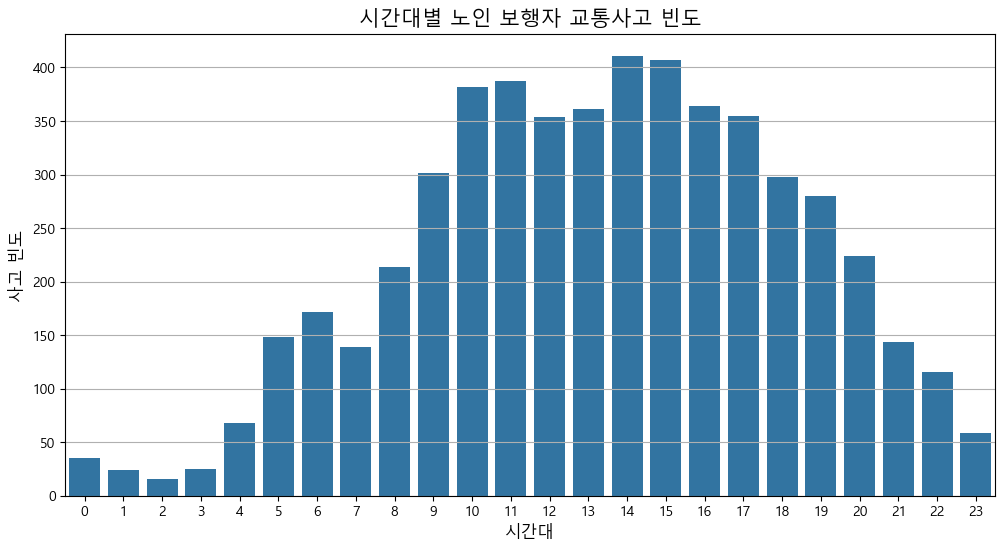

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# '사고일시' 컬럼을 datetime 객체로 변환
elderly_accidents_data['사고일시'] = pd.to_datetime(elderly_accidents_data['사고일시'], errors='coerce', format='%Y년 %m월 %d일 %H시')

# 시간대별 사고 빈도 계산을 위한 시간 추출
elderly_accidents_data['시간'] = elderly_accidents_data['사고일시'].dt.hour

# 시간대별 사고 빈도 계산
time_frequency = elderly_accidents_data['시간'].value_counts().sort_index()

# 시간대별 사고 빈도 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=time_frequency.index, y=time_frequency.values)
plt.title('시간대별 노인 보행자 교통사고 빈도', fontsize=15)
plt.xlabel('시간대', fontsize=12)
plt.ylabel('사고 빈도', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


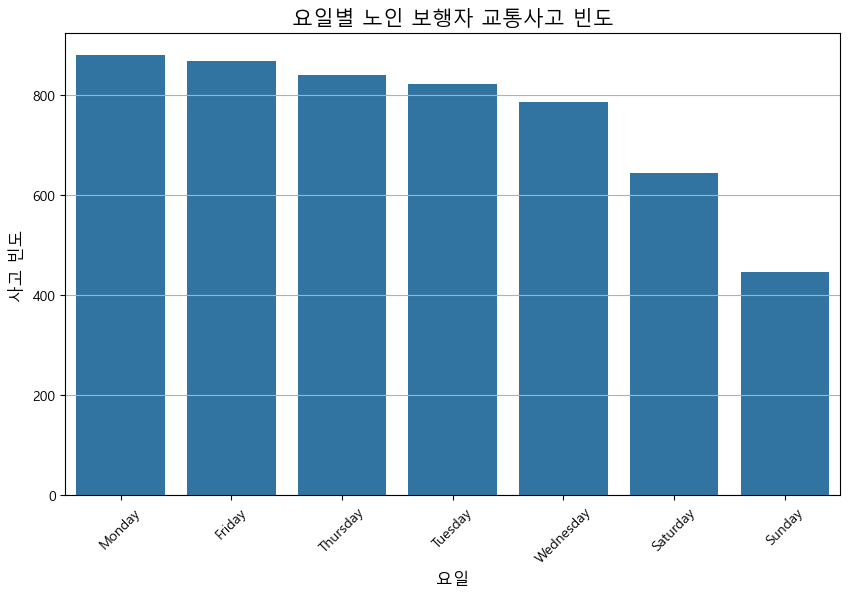

In [4]:
# 요일별 사고 빈도 계산을 위한 요일 추출
elderly_accidents_data['요일'] = elderly_accidents_data['사고일시'].dt.day_name()

# 요일별 사고 빈도 계산
weekday_frequency = elderly_accidents_data['요일'].value_counts()

# 요일별 사고 빈도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_frequency.index, y=weekday_frequency.values)
plt.title('요일별 노인 보행자 교통사고 빈도', fontsize=15)
plt.xlabel('요일', fontsize=12)
plt.ylabel('사고 빈도', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


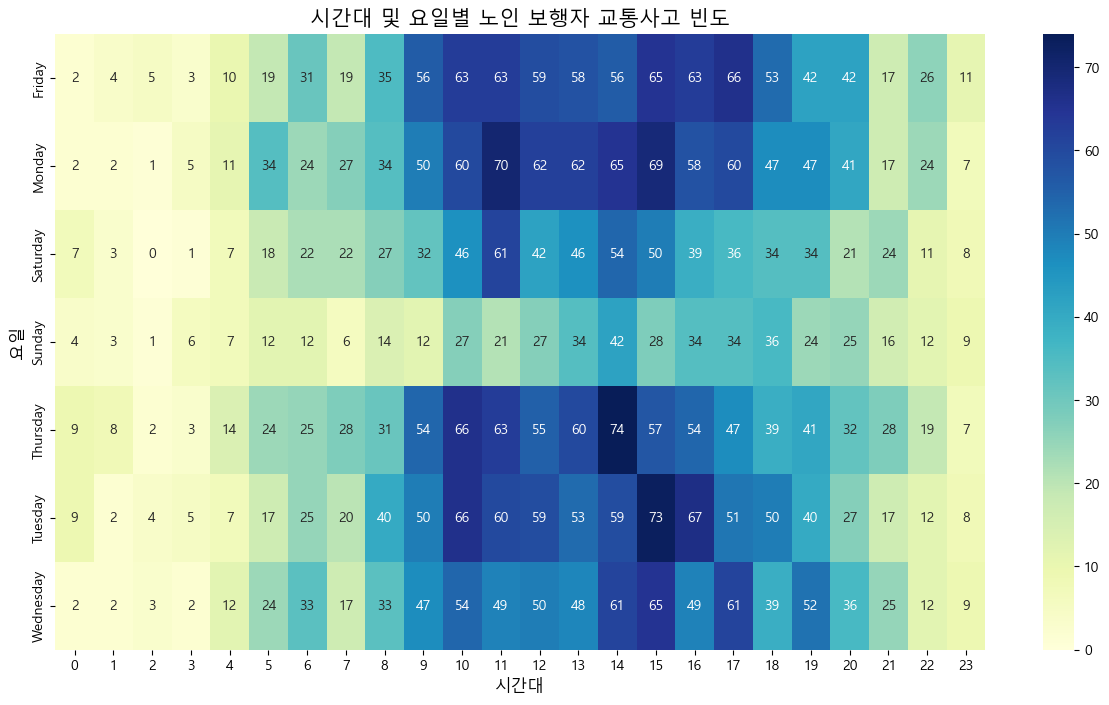

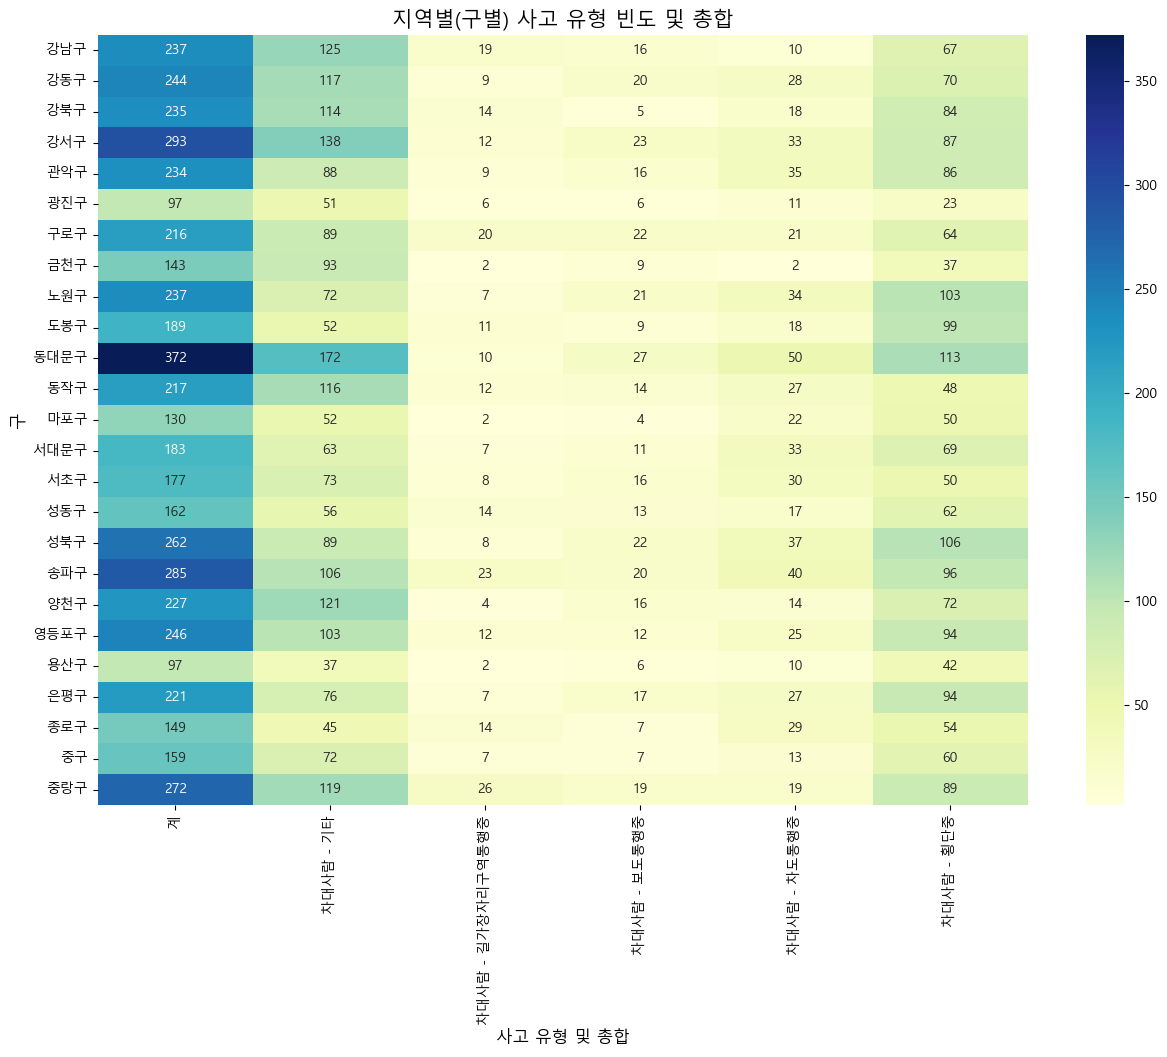

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# '사고일시' 컬럼을 datetime 객체로 변환
elderly_accidents_data['사고일시'] = pd.to_datetime(elderly_accidents_data['사고일시'], errors='coerce', format='%Y년 %m월 %d일 %H시')

# 시간대 및 요일 추출
elderly_accidents_data['시간'] = elderly_accidents_data['사고일시'].dt.hour
elderly_accidents_data['요일'] = elderly_accidents_data['사고일시'].dt.day_name()

# 1. 시간대 및 요일별 사고 발생 패턴 분석
# 시간대와 요일별 사고 빈도 계산
time_weekday_frequency = elderly_accidents_data.groupby(['요일', '시간']).size().unstack().fillna(0)

# 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(time_weekday_frequency, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('시간대 및 요일별 노인 보행자 교통사고 빈도', fontsize=15)
plt.xlabel('시간대', fontsize=12)
plt.ylabel('요일', fontsize=12)
plt.show()

# '시군구' 컬럼에서 '서울특별시' 다음에 나오는 구 이름 추출
elderly_accidents_data['구'] = elderly_accidents_data['시군구'].str.extract(r'서울특별시\s([가-힣]+구)')

# 추출된 '구' 컬럼을 사용하여 지역별 사고 유형 빈도 계산
region_accident_type_frequency = elderly_accidents_data.groupby(['구', '사고유형']).size().unstack().fillna(0)

# '사고유형' 별로 각 구에서 발생한 사고의 총합 계산
region_accident_type_frequency['계'] = region_accident_type_frequency.sum(axis=1)

# 재정렬하여 '계' 열을 가장 왼쪽에 위치시킴
columns_ordered = ['계'] + [col for col in region_accident_type_frequency.columns if col != '계']
region_accident_type_frequency = region_accident_type_frequency[columns_ordered]

# 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(region_accident_type_frequency, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('지역별(구별) 사고 유형 빈도 및 총합', fontsize=15)
plt.xlabel('사고 유형 및 총합', fontsize=12)
plt.ylabel('구', fontsize=12)
plt.show()

In [6]:
# '시군구' 컬럼에서 구 이름 추출
elderly_accidents_data['구'] = elderly_accidents_data['시군구'].str.extract(r'서울특별시\s([가-힣]+구)')

# 추가적인 피처 생성 예시
# 예: 사고 발생 시간대를 아침(6시-12시), 점심(12시-18시), 저녁(18시-24시), 밤(0시-6시)으로 구분
def assign_time_of_day(hour):
    if 6 <= hour < 12:
        return '아침'
    elif 12 <= hour < 18:
        return '점심'
    elif 18 <= hour < 24:
        return '저녁'
    else:
        return '밤'

# '시간' 컬럼을 사용하여 '시간대' 피처 생성
elderly_accidents_data['시간대'] = elderly_accidents_data['시간'].apply(assign_time_of_day)

# 결과 확인
elderly_accidents_data[['시간', '시간대', '구']].head()


,시간,시간대,구
0,15,점심,도봉구
1,19,저녁,동대문구
2,19,저녁,강동구
3,21,저녁,강남구
4,6,아침,양천구


In [18]:
# # 로지스틱 회귀, 결정 트리, 랜덤 포레스트 모델 사용을 위한 라이브러리 임포트
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# # 파일 경로 설정
# file_path = '종합db.csv'

# # 데이터 불러오기
# data = pd.read_csv(file_path)

# # 데이터 전처리
# # '구'를 기준으로 데이터를 그룹화하고 평균을 사용하여 대표 값을 구함
# grouped_data = data.groupby('구').mean().reset_index()

# # 예측할 타겟 변수 설정 (사고 비율)
# y = grouped_data['사고 비율(%)']

# # 예측에 사용할 피처 설정 (예: 노인 인구수, 병원 수, 노인복지시설 수 등)
# X = grouped_data.drop(['사고 비율(%)', '구'], axis=1)

# # 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# # 회귀 모델 초기화
# regression_models = {
#     'Linear Regression': LinearRegression(),
#     'Random Forest Regressor': RandomForestRegressor(),
#     'Gradient Boosting Regressor': GradientBoostingRegressor()
# }

# # 모델 훈련 및 평가
# regression_results = {}
# for name, model in regression_models.items():
#     model.fit(X_train, y_train)
#     predictions = model.predict(X_test)
#     mse = mean_squared_error(y_test, predictions)
#     regression_results[name] = mse

# regression_results

# # Linear Regression모델이 가장 낮은 mse값을 보인다. 가장 적합한 모델

{'Linear Regression': 5.944437239242067e-05,
 'Random Forest Regressor': 0.0002984362721795622,
 'Gradient Boosting Regressor': 0.00011770881702609877}

In [30]:
# 로지스틱 회귀, 결정 트리, 랜덤 포레스트 모델 사용을 위한 라이브러리 임포트
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 파일 경로 설정
file_path = '종합db.csv'

# 데이터 불러오기
data = pd.read_csv(file_path)

# 데이터 전처리
# '구'를 기준으로 데이터를 그룹화하고 평균을 사용하여 대표 값을 구함
grouped_data = data.groupby('구').mean().reset_index()

# 예측할 타겟 변수 설정 (예: 사고 비율)
y = grouped_data['사고 발생 건수']

# 예측에 사용할 피처 설정 (예: 노인 인구수, 병원 수, 노인복지시설 수 등)
X = grouped_data.drop(['사고 발생 건수', '구'], axis=1)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# 회귀 모델 초기화
regression_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

# 모델 훈련 및 평가
regression_results = {}
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    regression_results[name] = mse

regression_results

# Linear Regression모델이 가장 낮은 mse값을 보인다. 가장 적합한 모델

{'Linear Regression': 744.0593246164447,
 'Random Forest Regressor': 1027.73032,
 'Gradient Boosting Regressor': 863.9159185755727}

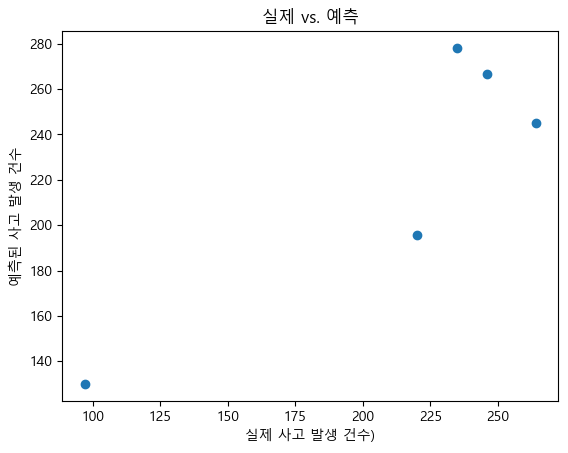

In [31]:
import matplotlib.pyplot as plt

# 실제 값과 예측된 값 시각화
plt.scatter(y_test, predictions)
plt.xlabel("실제 사고 발생 건수)")
plt.ylabel("예측된 사고 발생 건수")
plt.title("실제 vs. 예측")
plt.show()

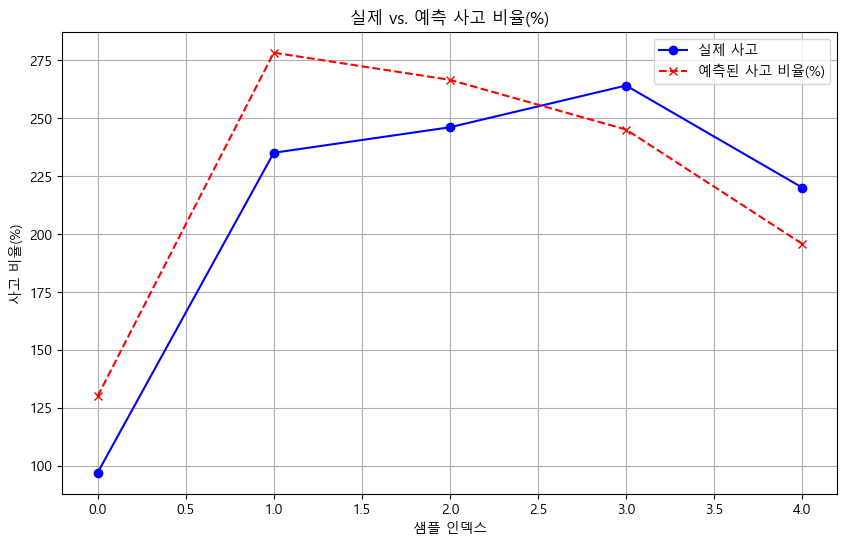

In [33]:
import matplotlib.pyplot as plt

# 실제 값과 예측된 값 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label="실제 사고 ", marker='o', linestyle='-', color='b')
plt.plot(range(len(predictions)), predictions, label="예측된 사고 비율(%)", marker='x', linestyle='--', color='r')
plt.xlabel("샘플 인덱스")
plt.ylabel("사고 비율(%)")
plt.title("실제 vs. 예측 사고 비율(%)")
plt.legend()
plt.grid(True)
plt.show()
